# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

In [6]:
emmbed_dict = {}
with open("/content/drive/MyDrive/glove.6B.50d.txt", 'r', encoding="utf-8") as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:],'float32')
    emmbed_dict[word]=vector

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Now we are going to find simmiliar word using the embedding provided by the GloVe. 
### We will input any word and based on the GloVe embedding it will provide simmilar words. RIVER: down below lists the 10 words very near to its meaning 

In [7]:
def find_similar_word(emmbedes):
  nearest = sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], emmbedes))
  return nearest

In [8]:
# lets find top 10 similar words for "RIVER"    creek: Narrow current of water


find_similar_word(emmbed_dict['river'])[0:10]

['river',
 'rivers',
 'creek',
 'valley',
 'tributary',
 'basin',
 'flows',
 'tributaries',
 'lake',
 'confluence']

## Let's say we want to find out what should be the top 10 outputs of similar words of "king + Queen + Prince" 
### One amazing thing that can be seen is that how phenomenal answer we are getitng using GloVe. Secondly, we will get some different words most of the time when we run this code again and again.

In [9]:
find_similar_word(emmbed_dict['king'] + emmbed_dict['queen'] + emmbed_dict['prince'])[0:10]

['king',
 'prince',
 'queen',
 'throne',
 'princess',
 'son',
 'emperor',
 'royal',
 'daughter',
 'father']

### To visualize the vectors, we are using a method called distributed stochastic gradient neighbor embeddings in short known as TSNE, which is used to reduce data dimensions. Here we are dealing with 200-dimensional data TSNE will break it down into components as we want here; we will break it into two dimensions.

### After training and fitting the TSNE model, it is all about plotting the vector; we are using a scatter plot as the vector is distributed over the space. The matplotlib library can do this. Annotating each point will give a more insightful vector representation. 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


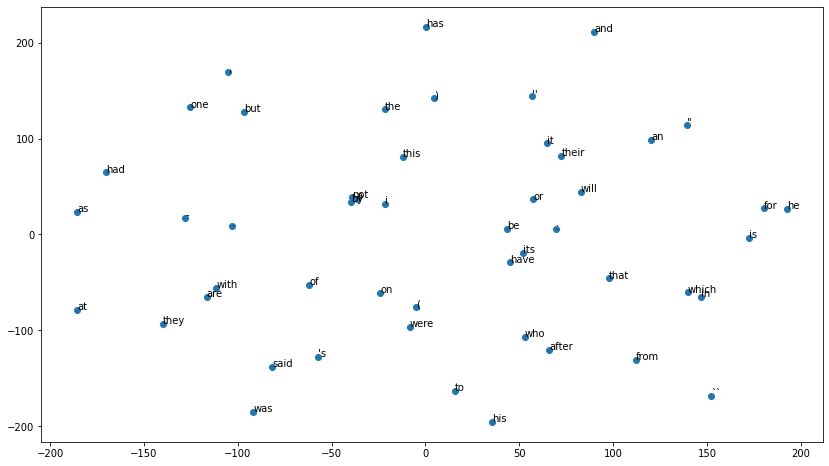

In [14]:
distri = TSNE(n_components=3)
words = list(emmbed_dict.keys())
vectors = [emmbed_dict[word] for word in words]
y = distri.fit_transform(vectors[700:750])
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()

### we have seen how vector representation techniques such as GloVe can be used to represent a given corpus with semantic meaning. Additionally, we have seen the main working idea behind the GloVe, which is a co-occurrence matrix, and how GloVe considers the particular word over others based on probabilities. 